# COMPARATIVE ANALYSIS OF COVID-19 TRENDS: UNITED STATES, INDIA, AND KENYA

## Introduction
The COVID-19 pandemic has affected countries around the world in vastly different ways, influenced by healthcare infrastructure, population dynamics, public health responses, and vaccine access. This report provides a comparative analysis of the pandemic's impact in three countries - the United States, India, and Kenya - using key indicators such as total cases, deaths, death rates, daily new cases, and vaccination progress over time. The goal is to draw meaningful insights into how different countries experienced and responded to the pandemic.

## Tools of Analysis
The analysis was conducted using the OWID (Our World in Data) COVID-19 dataset and Python in a Jupyter Notebook environment. Key tools and techniques included:

Pandas for data loading, cleaning, filtering, and manipulation,
Matplotlib and Seaborn for visualization of trends over time,
Datetime conversion and interpolation to handle missing values,
Line and bar charts for comparing metrics across countries and
Markdown cells for documentation and structured insights

This approach enabled clear visual comparisons of pandemic patterns and highlighted disparities in outcomes and vaccine rollouts.

In [2]:
import pandas as pd

# read data from CSV file
df = pd.read_csv ('owid-covid-data.csv')
print(df)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
350080      ZWE    Africa     Zimbabwe  2023-10-14     265808.0        0.0   
350081      ZWE    Africa     Zimbabwe  2023-10-15     265808.0        0.0   
350082      ZWE    Africa     Zimbabwe  2023-10-16     265808.0        0.0   
350083      ZWE    Africa     Zimbabwe  2023-10-17     265808.0        0.0   
350084      ZWE    Africa     Zimbabwe  2023-10-18     265808.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [3]:
print(df.columns) # View column names

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
print(df.head()) # Display the first 5 rows 

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [5]:
print(df.isnull().sum()) # Check for missing values

iso_code                                        0
continent                                   16665
location                                        0
date                                            0
total_cases                                 37997
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality                           337901
excess_mortality_cumulative_per_million    337901
Length: 67, dtype: int64


In [7]:
# Filter the DataFrame for countries in East Africa, North America and South Asia
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)]

# Generate the statistical summary
summary = df_filtered[['location', 'total_cases', 'total_deaths']].groupby('location').describe()

# Display the summary
print(summary)

              total_cases                                                \
                    count          mean           std  min          25%   
location                                                                  
India              1358.0  2.879837e+07  1.755475e+07  1.0  10328091.00   
Kenya              1314.0  2.264677e+05  1.276696e+05  1.0    101387.75   
United States      1368.0  5.561495e+07  3.908154e+07  1.0  18850110.50   

                                                    total_deaths  \
                      50%          75%          max        count   
location                                                           
India          34661531.5  44666042.00   44999588.0       1315.0   
Kenya            290594.0    341205.25     343999.0       1301.0   
United States  48503861.5  96513320.25  103436829.0       1328.0   

                                                                       \
                        mean            std  min        25%       5

In [8]:
# Define the key columns to check for missing values
critical_columns = ['date', 'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']

# Drop rows with missing values in critical columns
df_clean = df_filtered.dropna(subset=critical_columns).reset_index(drop=True)

# View cleaned data
print(df_clean.head())

  iso_code continent location        date  total_cases  new_cases  \
0      IND      Asia    India  2021-01-15   10527683.0    15590.0   
1      IND      Asia    India  2021-01-16   10542841.0    15158.0   
2      IND      Asia    India  2021-01-17   10557985.0    15144.0   
3      IND      Asia    India  2021-01-18   10571773.0    13788.0   
4      IND      Asia    India  2021-01-19   10581837.0    10064.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0           16323.714      151918.0       191.0              192.571  ...   
1           15886.000      152093.0       175.0              185.000  ...   
2           15385.857      152274.0       181.0              182.143  ...   
3           15025.429      152419.0       145.0              179.857  ...   
4           14665.429      152556.0       137.0              175.571  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0          20.6                   59.55            

In [9]:
# Convert date column to datetime format
df_clean['date'] = pd.to_datetime(df['date'])

# Display the first few rows
print(df_clean['date'].dtype) #Verify data is now in datetime
print(df_clean.head())

datetime64[ns]
  iso_code continent location       date  total_cases  new_cases  \
0      IND      Asia    India 2020-01-03   10527683.0    15590.0   
1      IND      Asia    India 2020-01-04   10542841.0    15158.0   
2      IND      Asia    India 2020-01-05   10557985.0    15144.0   
3      IND      Asia    India 2020-01-06   10571773.0    13788.0   
4      IND      Asia    India 2020-01-07   10581837.0    10064.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0           16323.714      151918.0       191.0              192.571  ...   
1           15886.000      152093.0       175.0              185.000  ...   
2           15385.857      152274.0       181.0              182.143  ...   
3           15025.429      152419.0       145.0              179.857  ...   
4           14665.429      152556.0       137.0              175.571  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0          20.6                   59.55   

In [17]:
#Explore which rows still have missing values

print(df_clean.isnull().sum())

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
population                                    0
excess_mortality_cumulative_absolute       2021
excess_mortality_cumulative                2021
excess_mortality                           2021
excess_mortality_cumulative_per_million    2021
Length: 67, dtype: int64


In [19]:
#Sort data by date for proper interpolation
df_sorted = df_clean.sort_values(by='date')

#Interpolate missing numerical values
cols_to_interpolate = [
    'excess_mortality',
    'excess_mortality_cumulative',
    'excess_mortality_cumulative_absolute',
    'excess_mortality_cumulative_per_million'
]

df_clean[cols_to_interpolate] = df_clean[cols_to_interpolate].interpolate()
print(df_clean[cols_to_interpolate].isnull().sum())

excess_mortality                           1270
excess_mortality_cumulative                1270
excess_mortality_cumulative_absolute       1270
excess_mortality_cumulative_per_million    1270
dtype: int64


In [10]:
# Combine interpolate then fill any remaining missing values
cols_to_fill = [
    'excess_mortality',
    'excess_mortality_cumulative',
    'excess_mortality_cumulative_absolute',
    'excess_mortality_cumulative_per_million'
]

df_clean[cols_to_fill] = df_clean[cols_to_fill].interpolate() #Combine interpolate
df_clean[cols_to_fill] = df_clean[cols_to_fill].fillna(0) #Fill any leftovers

print(df_clean[cols_to_fill].isnull().sum())

excess_mortality                           0
excess_mortality_cumulative                0
excess_mortality_cumulative_absolute       0
excess_mortality_cumulative_per_million    0
dtype: int64


In [11]:
print(df_clean.isnull().sum()) # Check again for any missing values

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
                                          ..
population                                 0
excess_mortality_cumulative_absolute       0
excess_mortality_cumulative                0
excess_mortality                           0
excess_mortality_cumulative_per_million    0
Length: 67, dtype: int64


# TOTAL COVID-19 CASES OVER TIME ACROSS THE GLOBE

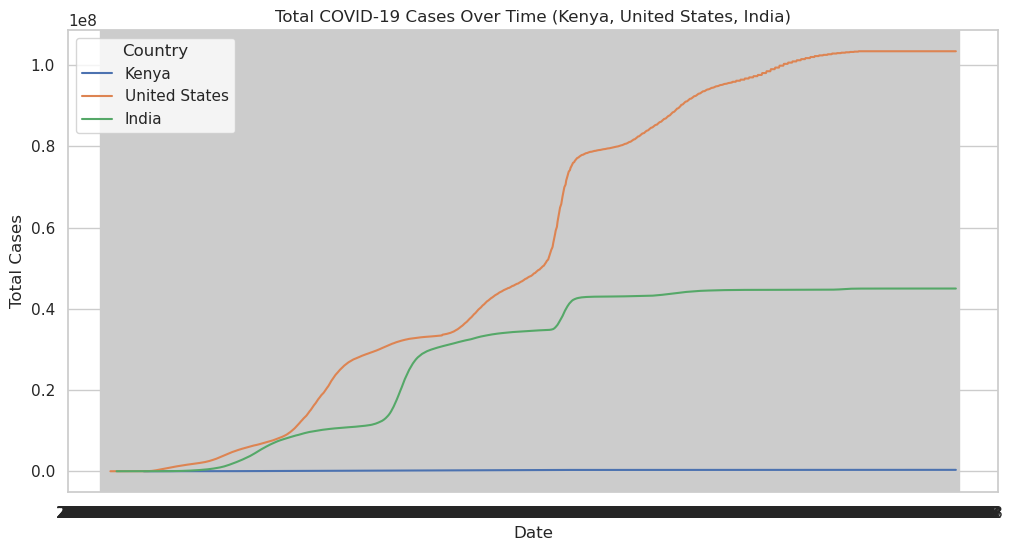

In [30]:
# Import required libraries
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set(style="whitegrid") #Set a seaborn style 

# Filter for countries in different continents
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)]

# Plotting a line chart for total cases over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

# Customize the plot
plt.title('Total COVID-19 Cases Over Time (Kenya, United States, India)')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend(title='Country')
plt.grid(True)

# Show the plot
plt.show()

## Key insights on Total COVID-19 Cases Over Time

### 1. United States had the highest total cases overall
The orange line (U.S.) reaches the highest point, crossing 100 million total cases. The growth is steep and continuous, with multiple waves visible. 

### 2. India shows large, but slower growth
The green line (India) shows significant rise, especially in mid-2021, likely due to the Delta variant wave. After that, the line flattens, suggesting a drop in new cases or under reporting.

### 3. Kenya's case numbers are much lower
The blue line (Kenya) is almost flat compared to the others. Total cases are under 2 million. This reflects a smaller outbreak, less testing, or under reporting.

### 4. Overall, the pandemic had distinct surges in different countries
U.S and India both had sharp increases, but at different times. Kenya's curve is very smooth, suggesting either a more contained spread or limited data resolution.

# TOTAL DEATHS OVER TIME

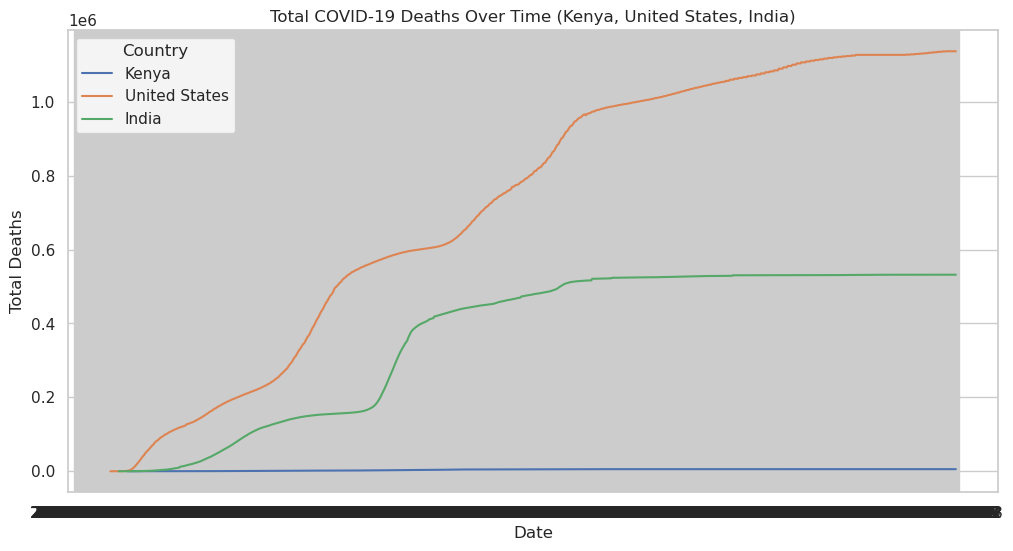

In [33]:
# Plotting another line chart for total deaths over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

# Customize the plot
plt.title('Total COVID-19 Deaths Over Time (Kenya, United States, India)')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend(title='Country')
plt.grid(True)

# Show the plot
plt.show()

## Key insights on Total COVID-19 Deaths Over Time

### 1. United States experienced the highest number of deaths
The orange line (U.S.A) shows a sharp and steady rise, crossing 1 million deaths, far surpassing the other two countries. 

### 2. India had significant mortality, but less than the US
India (green line) saw a steep increase in mid-2021, likely due to the Delta variant wave. Reaching just below 0.5 million deaths, then plateauing.

### 3. Kenya's reported deaths are significantly lower
The blue line (Kenya) is almost flat compared to the others, indicating very low reported deaths possibly due to fewer cases, less testing, or under reporting capacity or both.

### 4. Overall, the pandemic had distinct surges in different countries
U.S had continuous increases over time, India had rapid jumps during key outbreak periods, But Kenya remained relatively stable throughout.

# DAILY NEW COVID-19 CASES COMPARISON

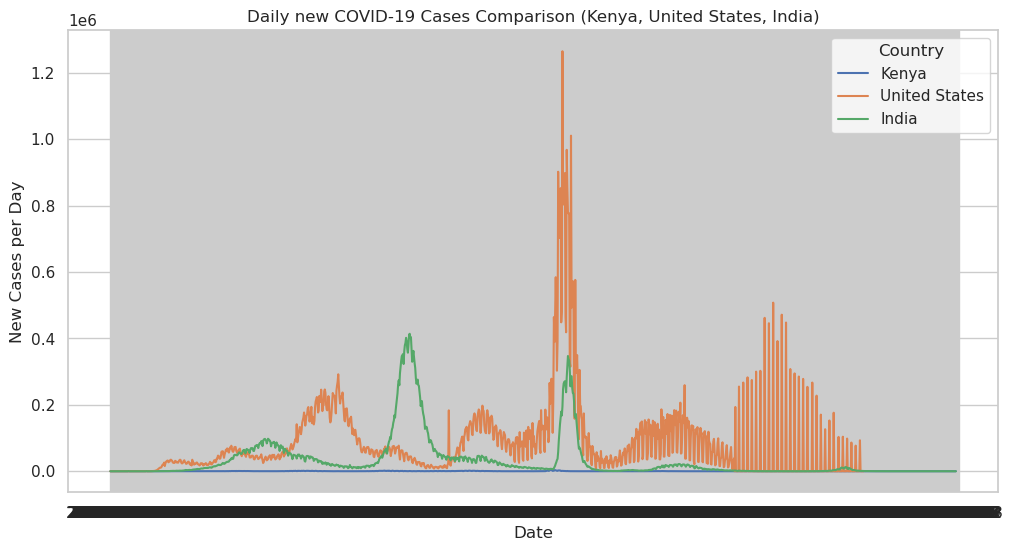

In [34]:
# Plotting a chart daily new cases
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

# Customize the plot
plt.title('Daily new COVID-19 Cases Comparison (Kenya, United States, India)')
plt.xlabel('Date')
plt.ylabel('New Cases per Day')
plt.legend(title='Country')

# Show the plot
plt.show()

## Daily new COVID-19 Cases Insights

### 1. United States (Orange line) experienced multiple major waves
The U.S.A displayed several sharp peaks throughout the timeline, indicating recurring waves of infections. The highest peak reached approximately 1.2 million cases daily likely during the Omicron wave around early 2022. This pattern shows persistent transmission and resurgences.

### 2. India experienced distinct waves with high intensity
India (green line) also showed multiple peaks, though lower in magnitude than the U.S. The highest peak hit around 0.4 million daily cases likely due to the Delta wave in mid-2021. After the Delta wave, cases dropped sharply and remained relatively lower.

### 3. Kenya's reported consistently low daily new cases
The blue line (Kenya) remained relatively flat throughout the period. This suggests low reported daily infections possibly due to lower testing rates, lower case detection or effective containment (to an extent).

### 4. Overall trend
The timeline shows that COVID-19 waves hit countries at different times, and at different intensities. Countries with larger populations and more international connectivity (like the U.S and India) faced higher spikes.

# ANALYSING THE DEATH RATE ACROSS COUNTRIES

In [36]:
# Calculate death rate
df_clean['death_rate'] = df_clean['total_deaths'] / df_clean['total_cases']

# Add and check new column
print(df_clean[['date', 'location', 'death_rate']].head())

        date location  death_rate
0 2020-01-03    India    0.014430
1 2020-01-04    India    0.014426
2 2020-01-05    India    0.014423
3 2020-01-06    India    0.014418
4 2020-01-07    India    0.014417


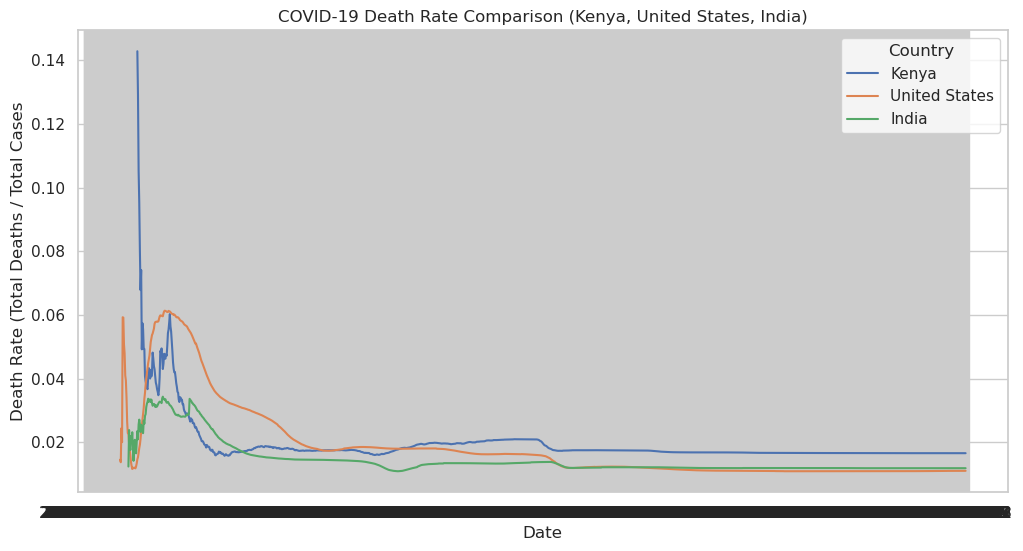

In [38]:
# Plot death rate to compare across countries
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)
# Customize the plot 
plt.title('COVID-19 Death Rate Comparison (Kenya, United States, India)')
plt.xlabel('Date')
plt.ylabel('Death Rate (Total Deaths / Total Cases')
plt.legend(title='Country')
plt.grid(True)

# Show the plot
plt.show()

## Key insights on Death Rate Comparison Over Time

### 1. United States showed multiple peaks that gradually declined 
The U.S.A (orange line) had several noticeable peaks in death rate, with the highest reaching around 0.6 million. These peaks aligned with major waves like Delta and Omicron. Overtime, the peaks decreased in height possibly due to vaccinations, better treatment and natural immunity.

### 2. India had a sharp rise then a steady fall
India (green line) experienced a sudden spike in death rate likely during the Delta variant wave followed by a decline. After this peak, the death rate dropped and remained low suggesting improvement in response or reduced reporting.

### 3. Kenya had a unique spike pattern
The blue line (Kenya) showed  a sharp spike up to ~0.14, then a drop to ~0.6, after which it steadily declined. This could include a localized outbreak or reporting change during that period. The overall trend remained much lower compared to India and the U.S.

### 4. General trend
Death rates tended to follow the wave patterns of new cases but were influenced by healthcare capacity, vaccinations, and population demographics. All countries eventually showed a declining death rate, which may reflect the global shift toward pandemic control.

# CUMULATIVE COVID-19 VACCINATIONS OVER TIME

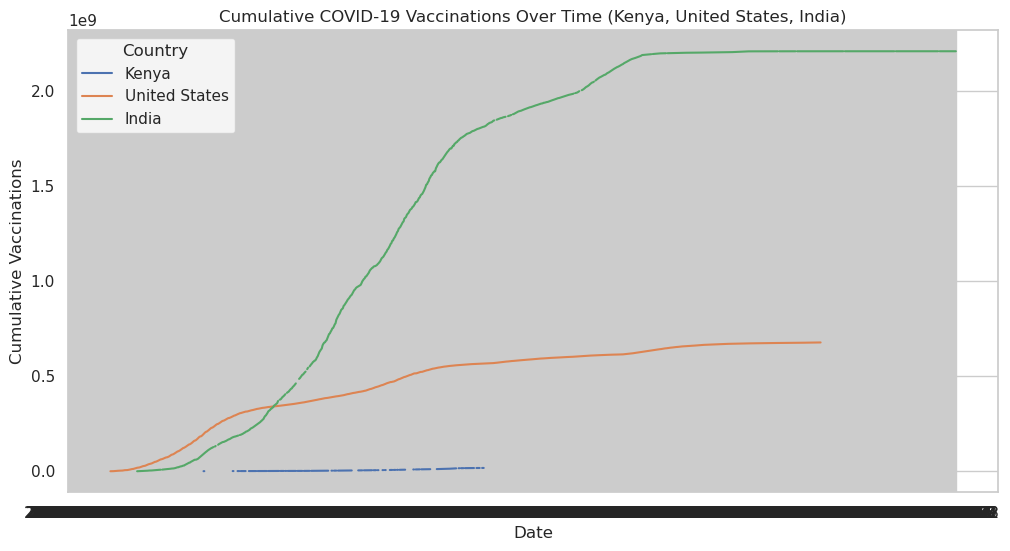

In [43]:
# Filter for countries in different continents
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)].copy()

# Plot cumulative vaccination over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

# Customize plot
plt.title('Cumulative COVID-19 Vaccinations Over Time (Kenya, United States, India)')
plt.xlabel('Date')
plt.ylabel('Cumulative Vaccinations')
plt.legend(title='Country')
plt.grid(True)

# Show plot
plt.show()

## Cumulative Vaccine Rollout Over Time 

### 1. United States showed an early rapid rollout
The U.S.A (orange line) saw a strong initial rise in vaccinations early in the timeline. After the initial surge, the line leveled off, indicating a plateau in vaccination efforts due to, reaching most of the willing population and vaccine hesitancy in some groups. 

### 2. India had an intense vaccination campaign
India (green line) exhibited a very steep rise in cumulative vaccinations for a sustained period. This suggests a massive nationwide campaign especially during and after major COVID waves. Eventually, the line also leveled off, buy at a very high total count.

### 3. Kenya had a slow and limited rollout 
The blue line (Kenya's) curve remained mostly flat,showing a very gradual increase. This could be due to limited vaccine supply, infrastructure challenges or slower public uptake.

### 4. Overall trend
High-income countries like the U.S rolled out vaccines earlier and faster. Middle income countries like India caught up with large-scale campaigns while lower-income countries like Kenya lagged behind in vaccine access and rollout.

# COVID-19 VACCINATION STATUS ACROSS CONTINENTS (PERCENTAGE AGAINST POPULATION)

In [45]:
# Filter for countries in different continents
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)]

# Drop rows with missing vaccination or population data
df_filtered = df_filtered.dropna(subset=['people_vaccinated', 'population'])

# Get the latest data per country (assuming 'date' column is in datetime format)
df_filtered['date'] = pd.to_datetime(df_filtered['date'])
latest_vax = df_filtered.sort_values('date').groupby('location').last()

# Compute vaccinated individuals per population (as a percentage)
latest_vax['vaccinated_per_population'] = (latest_vax['people_vaccinated'] / latest_vax['population']) * 100

# Select relevant columns for summary
result = latest_vax[['people_vaccinated', 'population', 'vaccinated_per_population']]
print(result)

               people_vaccinated    population  vaccinated_per_population
location                                                                 
India               1.027419e+09  1.417173e+09                  72.497779
Kenya               1.449437e+07  5.402748e+07                  26.827775
United States       2.702272e+08  3.382899e+08                  79.880368


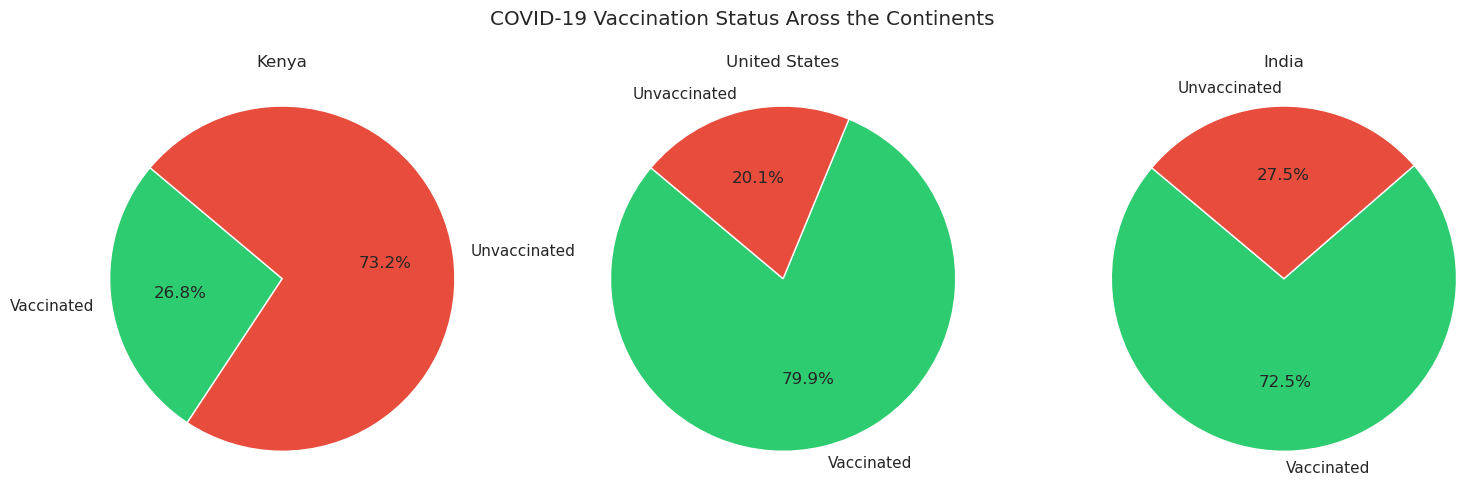

In [46]:
# Filter for the three countries
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)].dropna(subset=['people_vaccinated', 'population'])

# Ensure date column is datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Get the latest data per country
latest = df_filtered.sort_values('date').groupby('location').last()

# Setup subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

colors = ['#2ecc71', '#e74c3c']  # Green for vaccinated, red for unvaccinated

for i, country in enumerate(countries):
    vaccinated = latest.loc[country, 'people_vaccinated']
    population = latest.loc[country, 'population']
    unvaccinated = population - vaccinated

    sizes = [vaccinated, unvaccinated]
    labels = ['Vaccinated', 'Unvaccinated']

    axes[i].pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140)
    axes[i].set_title(f'{country}')
    axes[i].axis('equal')  # Equal aspect ratio ensures pie is a circle

plt.suptitle('COVID-19 Vaccination Status Aross the Continents')
plt.tight_layout()
plt.show()

## Key Insights on COVID-19 Vaccination Coverage (% of Population)

### 1. United States - 79.9% Vaccinated
The U.S. achieved high vaccination coverage, approaching 80% of the population. This suggests: Strong early access to vaccines, Effective public health campaigns (at least initially). Some eventual plateau, likely due to vaccine hesitancy.

### 2. India - 72.5% Vaccinated
India reached over 72% vaccination coverage, which is impressive given its large population. This indicates: Massive government-driven efforts, Public cooperation and Effective logistics in rural and urban areas despite challenges.

### 3. Kenya - 26.8% Vaccinated
Kenya's  vaccination rate remained much lower at just 26.8%. This could reflect: Limited vaccine availability early on, Public hesitancy or Infrastructure and outreach issues in rural areas.

### 4. Overall Reflection
There is a clear disparity in vaccination rates that aligns with income levels and healthcare infrastructure. Higher-income countries generally achieved higher coverage faster. Lower vaccination rates can leave populations more vulnerable to severe outbreaks and variants.

# Conclusion
This analysis of COVID-19 trends across the United States, India, and Kenya reveals significant differences in case numbers, mortality rates, and vaccination coverage - reflecting varying pandemic experiences and national capacities.

The United States consistently recorded the highest total cases and deaths, with multiple peaks and a strong early vaccine rollout that plateaued near 80% population coverage. Despite having advanced healthcare and vaccine access, the U.S. faced challenges with transmission control and vaccine hesitancy.
India showed intense infection waves, particularly during the Delta variant surge. Though it has a vast population, India managed a massive vaccination effort, reaching over 72% coverage. Its death rate spiked sharply but declined steadily, indicating an effective response in later stages.
Kenya, by contrast, reported significantly lower cases and deaths, possibly due to limited testing or reporting capacity. Its vaccination rollout was slow, reaching only 26.8% coverage, underscoring the global inequality in vaccine distribution and access.

Overall, the data highlights how the impact of COVID-19 varied not just by case counts, but also by healthcare infrastructure, government response, public behavior, and vaccine equity. These insights emphasize the importance of timely interventions, accurate data, and global cooperation in managing public health crises.

### Report by: Joan Francis.